# Data View - ETL

Notebook para carregar e visualizar os dados presentes na pasta ETL:
- `bronze/users.csv`
- `cryptocurrencies.json`

Execute as células abaixo para ver prévias e alguns gráficos rápidos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Carregar usuários
users = pd.read_csv('bronze/users.csv', parse_dates=['birthdate'])
users.head()

,id,nome,email,cpf,rg,cep,birthdate,gender,phone
0,1,Ana Silva,ana.silva@example.com,101.102.103-01,12.345.678-1,01001-000,1988-04-12,F,+55 11 91234-0001
1,2,Bruno Oliveira,bruno.oliveira@example.com,102.103.104-02,23.456.789-2,01311-000,1992-09-05,M,+55 11 91234-0002
2,3,Carla Pereira,carla.pereira@example.com,103.104.105-03,34.567.890-3,20010-000,1985-01-22,F,+55 71 91234-0003
3,4,Daniel Souza,daniel.souza@example.com,104.105.106-04,45.678.901-4,22040-001,1979-11-30,M,+55 21 91234-0004
4,5,Elisa Costa,elisa.costa@example.com,105.106.107-05,56.789.012-5,30110-000,1995-06-14,F,+55 31 91234-0005


In [3]:
# Informações gerais
users.info()
users.describe(include='all')

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         50 non-null     int64         
 1   nome       50 non-null     str           
 2   email      50 non-null     str           
 3   cpf        50 non-null     str           
 4   rg         50 non-null     str           
 5   cep        50 non-null     str           
 6   birthdate  50 non-null     datetime64[us]
 7   gender     50 non-null     str           
 8   phone      50 non-null     str           
dtypes: datetime64[us](1), int64(1), str(7)
memory usage: 8.1 KB


,id,nome,email,cpf,rg,cep,birthdate,gender,phone
count,50.00000,50,50,50,50,50,50,50,50
unique,NaN,50,50,50,10,50,NaN,2,50
top,NaN,Ana Silva,ana.silva@example.com,101.102.103-01,12.345.678-1,01001-000,NaN,F,+55 11 91234-0001
freq,NaN,1,1,1,5,1,NaN,26,1
mean,25.50000,NaN,NaN,NaN,NaN,NaN,1986-01-23 13:55:12,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,1959-02-04 00:00:00,NaN,NaN
25%,13.25000,NaN,NaN,NaN,NaN,NaN,1980-11-09 18:00:00,NaN,NaN
50%,25.50000,NaN,NaN,NaN,NaN,NaN,1986-11-13 12:00:00,NaN,NaN
75%,37.75000,NaN,NaN,NaN,NaN,NaN,1992-07-22 18:00:00,NaN,NaN
max,50.00000,NaN,NaN,NaN,NaN,NaN,1999-12-05 00:00:00,NaN,NaN


In [4]:
# Calcular idade aproximada a partir de birthdate e mostrar distribuição
today = pd.to_datetime('today')
users['age'] = (today - users['birthdate']).dt.days // 365
users[['nome','birthdate','age','gender']].head()

,nome,birthdate,age,gender
0,Ana Silva,1988-04-12,37,F
1,Bruno Oliveira,1992-09-05,33,M
2,Carla Pereira,1985-01-22,41,F
3,Daniel Souza,1979-11-30,46,M
4,Elisa Costa,1995-06-14,30,F


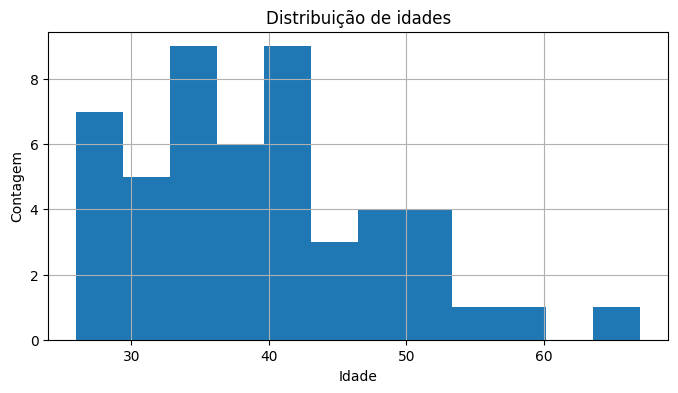

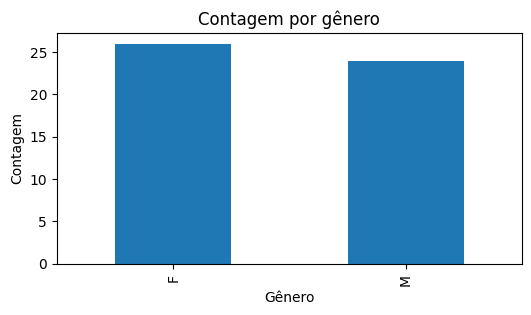

In [5]:
# Histogram de idades e contagem por gênero
plt.figure(figsize=(8,4))
users['age'].dropna().astype(int).hist(bins=12)
plt.title('Distribuição de idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize=(6,3))
users['gender'].value_counts().plot(kind='bar')
plt.title('Contagem por gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Carregar criptomoedas
cryptos = pd.read_json('bronze/cryptocurrencies.json')
cryptos.head()

FileNotFoundError: File cryptocurrencies.json does not exist

In [ ]:
# Top 10 por market cap (em bilhões USD)
cryptos_sorted = cryptos.sort_values('market_cap_usd', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(cryptos_sorted['symbol'], cryptos_sorted['market_cap_usd']/1e9, color='tab:blue')
plt.ylabel('Market Cap (USD bilhões)')
plt.title('Top 10 - Market Cap')
plt.show()

## Próximos passos
- Rode as células acima para inspecionar os dados.
- Posso adicionar filtros interativos (Plotly / ipywidgets) ou salvar resumos em CSV/JSON se quiser.